In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Data Loading and Preprocessing*
data = pd.read_csv('/content/drive/MyDrive/heart_disease_data.csv')

In [ ]:
# number of rows and columns in the dataset
data.shape

(303, 14)

In [ ]:
# checking for missing values
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Assuming 'target' is the name of your target variable column
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable
print(X)
print(y)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# checking the distribution of Target Variable
data['target'].value_counts()

,count
target,
1,165
0,138


In [ ]:
# 2. Model Selection and Training
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 3. Model Evaluation and Visualization
# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate Precision, recall, F1 score and AUC-ROC metrices
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
auc_roc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

Precision: 0.84
Recall: 0.84
F1-Score: 0.84
AUC-ROC: 0.92


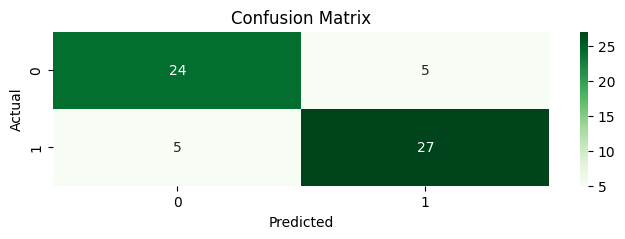

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

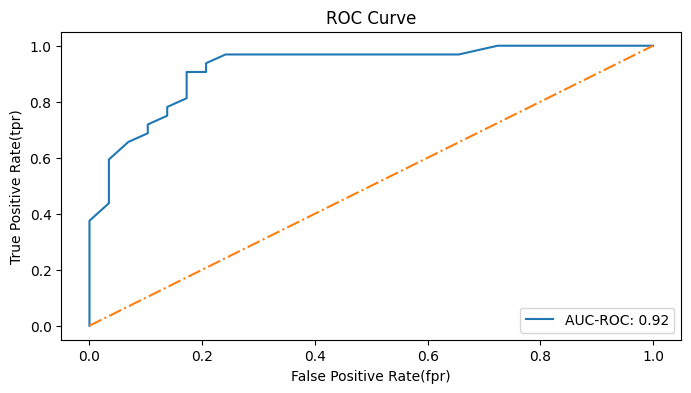

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, label=f'AUC-ROC: {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='dashdot')
plt.xlabel('False Positive Rate(fpr)')
plt.ylabel('True Positive Rate(tpr)')
plt.title('ROC Curve')
plt.legend()
plt.show()

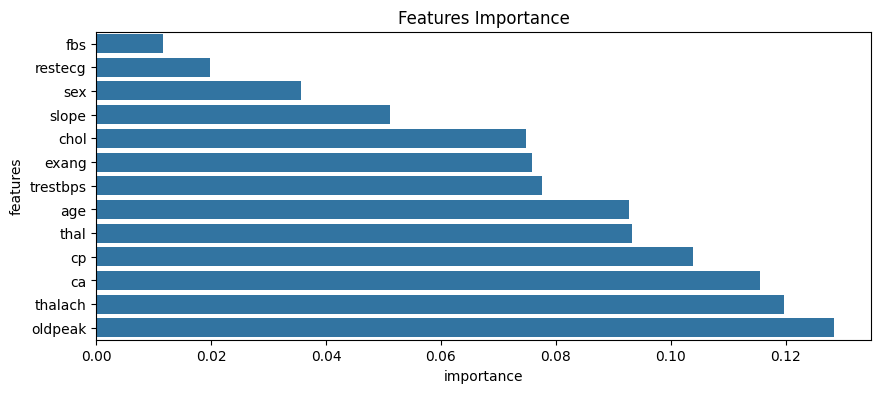

In [ ]:
# Features Importance
feature_importance = pd.DataFrame({'features': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=True)
plt.figure(figsize=(10, 4))
sns.barplot(x='importance', y='features', data=feature_importance)
plt.title('Features Importance')
plt.show()